In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer

In [26]:
data = pd.read_excel('Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
data = data[data["CustomerID"].notna()]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [30]:
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

C:\Users\MR-14\AppData\Local\Temp\ipykernel_2448\1841269460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))


In [31]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceDay
count,406829.000000,406829,406829.000000,406829.000000,406829
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,2011-07-10 03:16:19.124890624
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010-12-01 00:00:00
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,2011-04-06 00:00:00
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,2011-07-31 00:00:00
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,2011-10-20 00:00:00
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 00:00:00
std,248.693370,NaN,69.315162,1713.600303,NaN


In [8]:
word_tokenize(data["Description"][0])

['WHITE', 'HANGING', 'HEART', 'T-LIGHT', 'HOLDER']

In [9]:
[w for w in word_tokenize(data["Description"][0]) if not w in stopwords.words('english')]

['WHITE', 'HANGING', 'HEART', 'T-LIGHT', 'HOLDER']

In [14]:
# Choose a language for stemming, for example, English
stemmer = SnowballStemmer(language='english')

# Example words to stem
words_to_stem = [w for w in word_tokenize(data["Description"][0]) if not w in stopwords.words('english')]


# Apply Snowball Stemmer
stemmed_words = [stemmer.stem(word) for word in words_to_stem]

# Print the results
print("Original words:", words_to_stem)
print("Stemmed words:", stemmed_words)


Original words: ['WHITE', 'HANGING', 'HEART', 'T-LIGHT', 'HOLDER']
Stemmed words: ['white', 'hang', 'heart', 't-light', 'holder']


In [19]:
lemma = nltk.wordnet.WordNetLemmatizer()

stemmed_words = [lemma.lemmatize(word) for word in words_to_stem]
stemmed_words


['WHITE', 'HANGING', 'HEART', 'T-LIGHT', 'HOLDER']

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MR-14\AppData\Roaming\nltk_data...


True

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = data["Description"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.toarray())
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array(['10 balloons', '10 blue', '10 cards', ..., 'zinc watering',
       'zinc willie', 'zinc wire'], dtype=object)

In [27]:
len(vectorizer2.get_feature_names_out())


6967

In [32]:
data["Cost"] = data["Quantity"] * data["UnitPrice"]

C:\Users\MR-14\AppData\Local\Temp\ipykernel_2448\3696299223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cost"] = data["Quantity"] * data["UnitPrice"]


In [33]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [34]:
b = data.groupby("CustomerID").agg(All_Cost = ("Cost", "sum"),
                                   All_Description = ("Description", lambda x: x),
                                   Country = ("Country", lambda x: list(set(x))[0]),
                                   InvoiceNo_count = ("InvoiceNo", "count")
                                  )
b

,All_Cost,All_Description,Country,InvoiceNo_count
CustomerID,,,,
12346.0,0.00,"[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...",United Kingdom,2
12347.0,4310.00,"[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...",Iceland,182
12348.0,1797.24,"[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES...",Finland,31
12349.0,1757.55,"[PARISIENNE CURIO CABINET, SWEETHEART WALL TID...",Italy,73
12350.0,334.40,"[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI...",Norway,17
...,...,...,...,...
18280.0,180.60,"[WOOD BLACK BOARD ANT WHITE FINISH, RETROSPOT ...",United Kingdom,10
18281.0,80.82,"[ROBOT BIRTHDAY CARD, CARD CIRCUS PARADE, PENN...",United Kingdom,7
18282.0,176.60,"[ANTIQUE CREAM CUTLERY CUPBOARD, FRENCH STYLE ...",United Kingdom,13


In [35]:
b["All_Description"] = b["All_Description"].apply(lambda x: " ".join(list(set([h for s in [i.split() for i in x] for h in s]))))

In [36]:
b

,All_Cost,All_Description,Country,InvoiceNo_count
CustomerID,,,,
12346.0,0.00,JAR MEDIUM STORAGE CERAMIC TOP,United Kingdom,2
12347.0,4310.00,RED COLOUR 3D BLUE CANDLE 40 SINGLE SHAPE WOOD...,Iceland,182
12348.0,1797.24,60 RED BALLOONS DOILIES BLUE MULTI ICE SWEETIE...,Finland,31
12349.0,1757.55,RED WOODEN CIRCUS SHAPE SMALL SHELF PLASTERS W...,Italy,73
12350.0,334.40,RED BLUE BATHROOM WITCH PLASTERS MOD TEA VINTA...,Norway,17
...,...,...,...,...
18280.0,180.60,WHITE RED WOODEN ANT BAKELIKE CHOICE BOARD KIN...,United Kingdom,10
18281.0,80.82,CIRCUS BABY GUMBALL SPACEBOY PARADE GIRL DOLLY...,United Kingdom,7
18282.0,176.60,COLOUR MILK TIER STORAGE ENAMEL VILLAGE 3 LARG...,United Kingdom,13


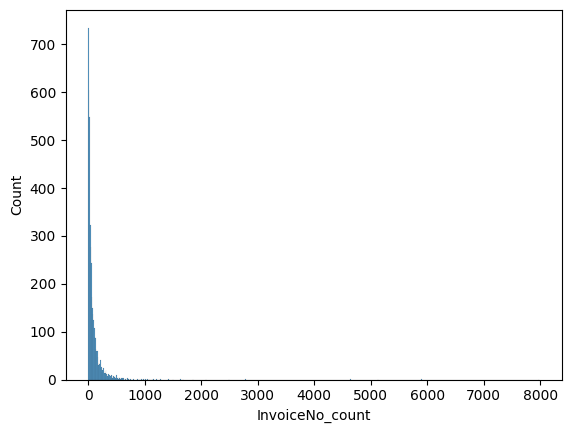

In [37]:
sns.histplot(b["InvoiceNo_count"])
plt.show()

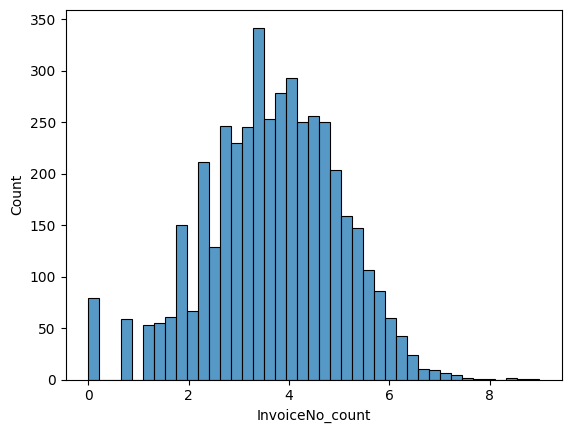

In [38]:
b["InvoiceNo_count"] = np.log(b["InvoiceNo_count"])
sns.histplot(b["InvoiceNo_count"])
plt.show()

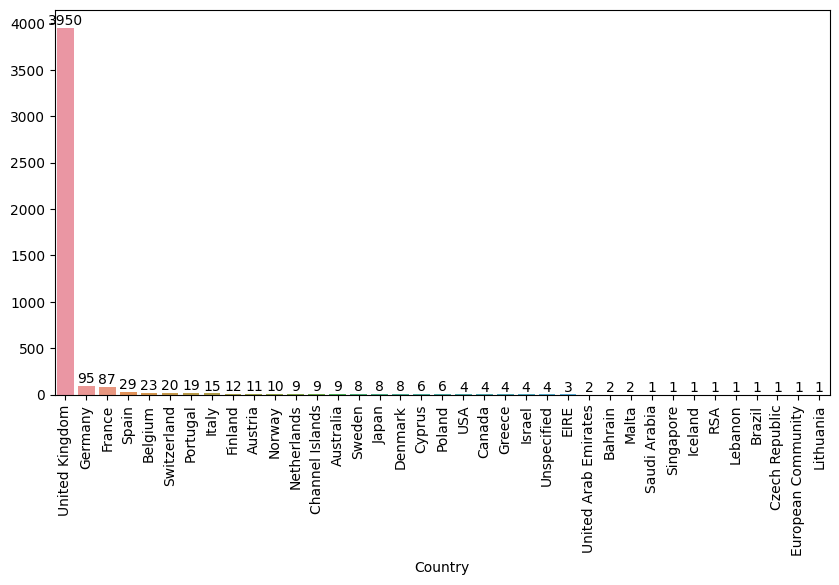

In [39]:
plt.figure(figsize=(10,5))
bar = sns.barplot(x=b["Country"].value_counts().index, y=b["Country"].value_counts().to_list())
plt.xticks(rotation=90)

# Add the value labels
bar.bar_label(bar.containers[0])
plt.show()

In [40]:
b['Country'] = b['Country'].apply(lambda x: 'other' if x not in ["United Kingdom", "Germany", "France", "Spain"] else x)

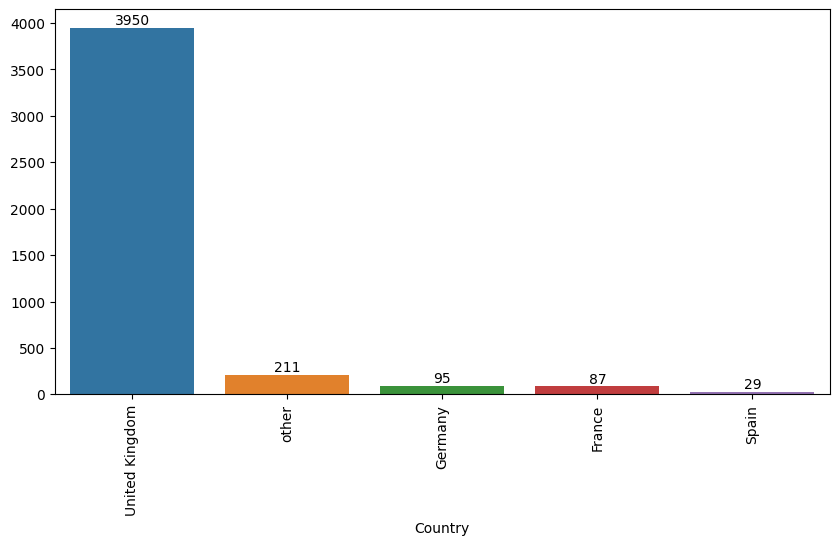

In [41]:
plt.figure(figsize=(10,5))
bar = sns.barplot(x=b["Country"].value_counts().index, y=b["Country"].value_counts().to_list())
plt.xticks(rotation=90)

# Add the value labels
bar.bar_label(bar.containers[0])
plt.show()

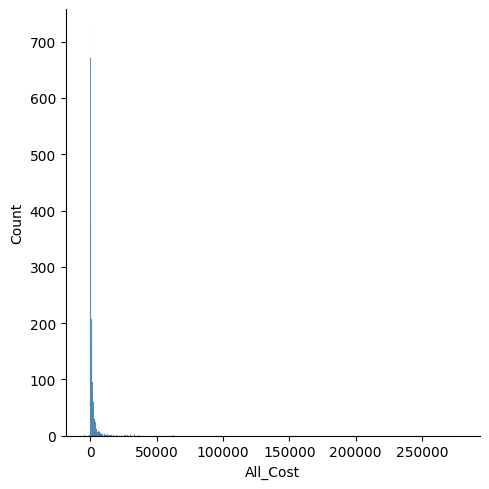

In [51]:
sns.displot(b["All_Cost"])
plt.show()

In [52]:
b

,All_Cost,All_Description,Country,InvoiceNo_count
CustomerID,,,,
12346.0,0.00,JAR MEDIUM STORAGE CERAMIC TOP,United Kingdom,0.693147
12347.0,4310.00,RED COLOUR 3D BLUE CANDLE 40 SINGLE SHAPE WOOD...,other,5.204007
12348.0,1797.24,60 RED BALLOONS DOILIES BLUE MULTI ICE SWEETIE...,other,3.433987
12349.0,1757.55,RED WOODEN CIRCUS SHAPE SMALL SHELF PLASTERS W...,other,4.290459
12350.0,334.40,RED BLUE BATHROOM WITCH PLASTERS MOD TEA VINTA...,other,2.833213
...,...,...,...,...
18280.0,180.60,WHITE RED WOODEN ANT BAKELIKE CHOICE BOARD KIN...,United Kingdom,2.302585
18281.0,80.82,CIRCUS BABY GUMBALL SPACEBOY PARADE GIRL DOLLY...,United Kingdom,1.945910
18282.0,176.60,COLOUR MILK TIER STORAGE ENAMEL VILLAGE 3 LARG...,United Kingdom,2.564949


In [65]:
stemmer = SnowballStemmer(language='english')

for r in b.iterrows():
    desc = b.loc[r[0],"All_Description"]
    tokenized = word_tokenize(desc)
    tokenized_filtered = [w for w in tokenized if not w in stopwords.words('english')]
    tokenized_filtered_stemmed = [stemmer.stem(w) for w in tokenized_filtered]
    b.loc[r[0]]["All_Description"] = " ".join(tokenized_filtered_stemmed)
    

C:\Users\MR-14\AppData\Local\Temp\ipykernel_2448\4039151924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.loc[r[0]]["All_Description"] = " ".join(tokenized_filtered_stemmed)


In [67]:
b["All_Description"][12350.0]

'RED BLUE BATHROOM WITCH PLASTERS MOD TEA VINTAGE COVER SPACEBOY WAY NEIGHBOURHOOD BOX SIGN SPINNING LUGGAGE UNION POLKADOT RETROSPOT IN PAISLEY TAG RETRO PLASTIC CHOCOLATE POSTAGE JACK TRADITIONAL 4 FLAG HARMONICA THIS ELEPHANT BAG PINK/PURPLE RADIO TOPS METAL CALCULATOR PASSPORT PLATE TIN TRAY'

In [69]:
b.loc[r[0],"All_Description"]

"RED COLOUR SUCTION BLUE CANDLE WOODEN SMALL BUTTERFLY RING LIP SILVER WINKIE DESIGN LIZARD CAT BOWL FOLK TURQUOISE HOT NESTING SUNDAE CAKE YELLOW SET CREAM HEART GLOSS FABRIC FUSCHIA CIRCLES WARMER DECORATION OWL CHERRY FAWN MONKEY PRINCE PEN TISSUES FROG HOLDER BOXES BUBBLEGUM DOUGHNUT STAR IN 6 SYMPATHY T-LIGHTS LITTLE DECORATIONS WOOD PLACE BONE 2 50'S CHALET CANDLES GIFT 4 CUP WITH WILLIE SCOTTY BABUSHKA CHINA MUG OF SPRING SWISS CHRISTMAS LIFE BELL CERAMIC NOTEBOOK SPONGE GINGHAM BOX BATH SCARF DOLL RETROSPOT PONY ASSORTED PAINTED HOLLY ART TISSUE BOTTLE AND SANTA LIPSTICK TOADSTOOLS SLEIGH METAL WATER FRIENDS PURPLE T-LIGHT ICE SET/4 HAND 3 LARGE TEA BANK VINTAGE 12 TREE BELLS GLITTER IVORY PUDDING SETTINGS BUBBLES PACK DOG ROSE STRAWBERRY TRINKET FLOWER MINI SET/6 CRAFT 7 HANDBAG S/4 SWEETIE HANGING PINK TREES MONEY HOOK APPLE POT"

In [ ]:
for r in b.iterrows():
    print(b.loc[r[0],"All_Description"])

In [63]:
b.loc[r[0]]["All_Description"]

"RED COLOUR SUCTION BLUE CANDLE WOODEN SMALL BUTTERFLY RING LIP SILVER WINKIE DESIGN LIZARD CAT BOWL FOLK TURQUOISE HOT NESTING SUNDAE CAKE YELLOW SET CREAM HEART GLOSS FABRIC FUSCHIA CIRCLES WARMER DECORATION OWL CHERRY FAWN MONKEY PRINCE PEN TISSUES FROG HOLDER BOXES BUBBLEGUM DOUGHNUT STAR IN 6 SYMPATHY T-LIGHTS LITTLE DECORATIONS WOOD PLACE BONE 2 50'S CHALET CANDLES GIFT 4 CUP WITH WILLIE SCOTTY BABUSHKA CHINA MUG OF SPRING SWISS CHRISTMAS LIFE BELL CERAMIC NOTEBOOK SPONGE GINGHAM BOX BATH SCARF DOLL RETROSPOT PONY ASSORTED PAINTED HOLLY ART TISSUE BOTTLE AND SANTA LIPSTICK TOADSTOOLS SLEIGH METAL WATER FRIENDS PURPLE T-LIGHT ICE SET/4 HAND 3 LARGE TEA BANK VINTAGE 12 TREE BELLS GLITTER IVORY PUDDING SETTINGS BUBBLES PACK DOG ROSE STRAWBERRY TRINKET FLOWER MINI SET/6 CRAFT 7 HANDBAG S/4 SWEETIE HANGING PINK TREES MONEY HOOK APPLE POT"

In [83]:
bb = b.reset_index()
bb.drop("CustomerID", axis=1, inplace=True)
bb

,All_Cost,All_Description,Country,InvoiceNo_count
0,0.00,JAR MEDIUM STORAGE CERAMIC TOP,United Kingdom,0.693147
1,4310.00,RED COLOUR 3D BLUE CANDLE 40 SINGLE SHAPE WOOD...,other,5.204007
2,1797.24,60 RED BALLOONS DOILIES BLUE MULTI ICE SWEETIE...,other,3.433987
3,1757.55,RED WOODEN CIRCUS SHAPE SMALL SHELF PLASTERS W...,other,4.290459
4,334.40,RED BLUE BATHROOM WITCH PLASTERS MOD TEA VINTA...,other,2.833213
...,...,...,...,...
4367,180.60,WHITE RED WOODEN ANT BAKELIKE CHOICE BOARD KIN...,United Kingdom,2.302585
4368,80.82,CIRCUS BABY GUMBALL SPACEBOY PARADE GIRL DOLLY...,United Kingdom,1.945910
4369,176.60,COLOUR MILK TIER STORAGE ENAMEL VILLAGE 3 LARG...,United Kingdom,2.564949
4370,2094.88,WOODEN 3D LIP SCANDINAVIAN SPOTTY BUNDLE MICE ...,United Kingdom,6.628041
